In [2]:
from IPython.display import Image, display
from langchain_core.messages import HumanMessage
from kasflow.graphs.chat import ChatGraph
from kasflow.graphs.recorder import RecorderGraph
from kasflow.graphs.main import MainGraph, MainState
from kasflow.store import init_store

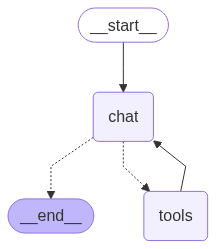

In [3]:
chat_graph = ChatGraph()
display(Image(chat_graph.draw()))

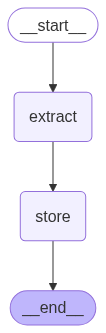

In [4]:
recorder_graph = RecorderGraph()
display(Image(recorder_graph.draw()))

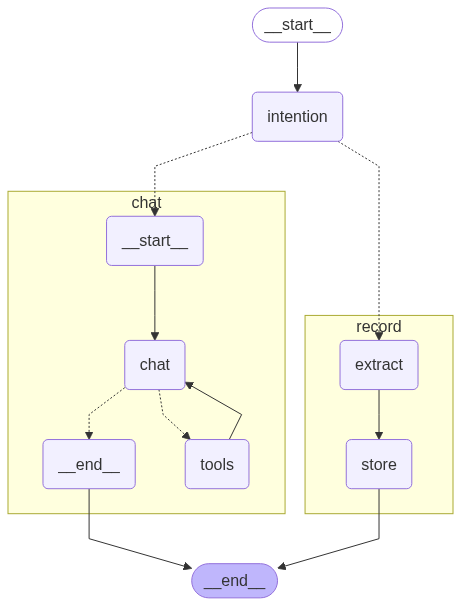

In [5]:
main_graph = MainGraph()
display(Image(main_graph.draw(xray=1)))

In [7]:
compiled_graph = main_graph.compiled

async def main(message: str) -> MainState:
    async with init_store(":memory:") as store:
        input = MainState(messages=[HumanMessage(content=message)])
        config = {"configurable": {"store": store, "thread_id": 1, "user_id": 1}}
        return await compiled_graph.ainvoke(input, config)

In [8]:
output = await main("Tea for $25")
output

{'messages': [HumanMessage(content='Tea for $25', additional_kwargs={}, response_metadata={}, id='d6d3c37c-081c-42f1-a3df-3bd9941d51c8')],
 'intention': 'record',
 'chat_response': '',
 'record_expenses': [Expense(id=None, user_id=1, amount=25.0, category='food', description='Tea', created=None, updated=None)],
 'record_stored': True,
 'record_exception': ''}

In [9]:
output = await main("how much I spent on tea?")
output

{'messages': [HumanMessage(content='Tea for $25', additional_kwargs={}, response_metadata={}, id='d6d3c37c-081c-42f1-a3df-3bd9941d51c8'),
  HumanMessage(content='how much I spent on tea?', additional_kwargs={}, response_metadata={}, id='50db93fb-0fdc-44b0-98a2-159d0f269b47'),
  AIMessage(content='You have spent $25 on tea.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 256, 'total_tokens': 264, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-By7G1yUJlTSBvysoMmKBnDMwXncOf', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b52e44cb-08af-4059-ad5e-bd350c3bc95d-0', usage_metadata={'input_tokens': 256, 'output_tokens': 8, 'total_tokens': 264, '